# Chapter3 회귀 알고리즘과 모델 규제 
## 03-1 k-최근접 이웃 회귀
### 목적1: 지도 학습의 한 종류인 회귀 문제를 이해
### 목적2: K-최근접 이웃 알고리즘을 사용해 농어의 무게 예측하는 회귀 문제 풀기
### Keyword: k-최근접회귀, 결정계수(R2), 과대적합, 과소적합
### 핵심패키지 and 함수: KNneighborsRegressor, mean_absolute_error(), reshape()

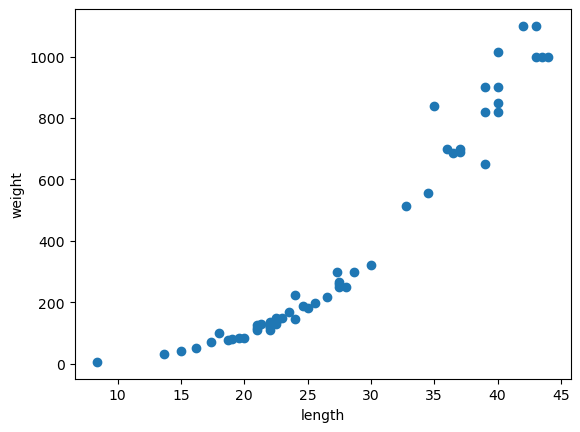

In [2]:
#농어의 길이와 무게 불러오기

import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
#훈련세트와 데이터 세트로 나눈다 

from sklearn.model_selection import train_test_split   #train_test_split() 함수
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [4]:
#사이킷런에서는 2차원 배열로 바꿔야함
#이번 예제는 feature 1개만 사용함으로 수동으로 2차원 배열 제작

#1차원 배열 확인
test_array = np.array ([1,2,3,4])
print(test_array.shape)

(4,)


In [7]:
#(2,2) 배열 변경 
#reshape method 사용
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
#에러상황: array의 배열이(4,)이기 때문에 원소의 갯수는 4임. (2,3)의 경우 원소의 갯수가 6이기 때문에 원소의 갯수가 맞이 않아 에러가 남
test_array =test_array.reshaep(2, 3)
print(test_array.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'reshaep'

In [ ]:
#배열의 크기를 자동으로 지정하는 기능
#크기에 -1을 지정하면 다른 차원을 채우고 남은 원소에 맞게 차원 지정
#reshpae(-1,1)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
#K-최근접 이웃 회귀 알고리즘(KNeighborsRegressor)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

#결정계수(coefficient of determination), R2= (타킷-예측)2의 합/(타깃-평균)2의 합
#타깃의 평균 정도를 예측하는 수준(분자와 분모가 비슷, R2은 0에 가까움)
#예측이 타킷에 아주 가까워짐(분자가 0에 가까워짐, R2는 1에 가까움)
print(knr.score(test_input,test_target))

0.992809406101064


In [ ]:
#타깃과 예측한 값 사이의 차이-> 예측이 어느 정도 벗어났는지 가늠
#패키지: sklearn.metrics
#함수: mean_absolute_error (절대값 오차의 평균) 
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#결과:결과에서 예측이 평균적으로 19g 정도 타깃값과 다름

19.157142857142862


# 과대적합 vs 과소적합
### 과대적합(overfitting): 훈련세트 점수 > 테스트 세트 점수 (훈련세트에만 잘 맞는 모델)
### 과소적합(underfitting): 훈련세트 점수 < 테스트 세트 점수 or 두 점수가 모두 낮을때
### 과소적합의 원인 1) 모델이 단순하여 훈련 세트에 적절히 훈련되지 않은 경우
###                 2) 훈련세트와 테스트 세트의 크기가 작을 떄

In [ ]:
#train세트에서의 결정계수 값
print(knr.score(train_input, train_target))

#테스트세트: 0.992809406101064
#훈련세트: 0.9698823289099254
#여기까지 예제 문제는 테스트세트>훈련세트로 과소적합 --> 모델을 복잡하게 만들자 --> 이웃의 개수 k를 줄이자

0.9698823289099254


In [13]:
#모델을 복잡하게 만들기 위해 K의 수를 5에서 3으로 줄임
knr.n_neighbors=3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input,test_target))

#훈련세트점수=0.9804899950518966
#테스트세트점수=0.9746459963987609
#이웃K값 조정 후 훈련세트>테스트세트, 두 값이 유사함으로 overfitting도 아님

0.9746459963987609
